In [1]:
import os
import pymupdf  # PyMuPDF
from PIL import Image, ImageDraw
import io
import numpy as np

In [2]:
from llm.llm_utils import get_code_from_text_response
from llm.llm.gemini import Gemini

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def convert_pdf_to_images(pdf_file):
    # Open the PDF
    pdf_document = pymupdf.open(pdf_file)

    images = []
    
    for page_number in range(len(pdf_document)):
        # Get the page
        page = pdf_document.load_page(page_number)

        # Convert the page to an image (resolution of 300 DPI)
        pix = page.get_pixmap(dpi=300)

        # Save the image in memory
        img_data = pix.tobytes("png")
        image = Image.open(io.BytesIO(img_data))

        # Store the image in a list
        images.append(image)
        
        # Optionally save the image to a file
        # image.save(f'page_{page_number + 1}.png')

    return images

In [4]:
images = convert_pdf_to_images(r"C:\Users\Admin\Downloads\20240814 - CTG - CBTT BCTC hop nhat 6 thang dau nam 2024 da soat xet_signed.pdf")

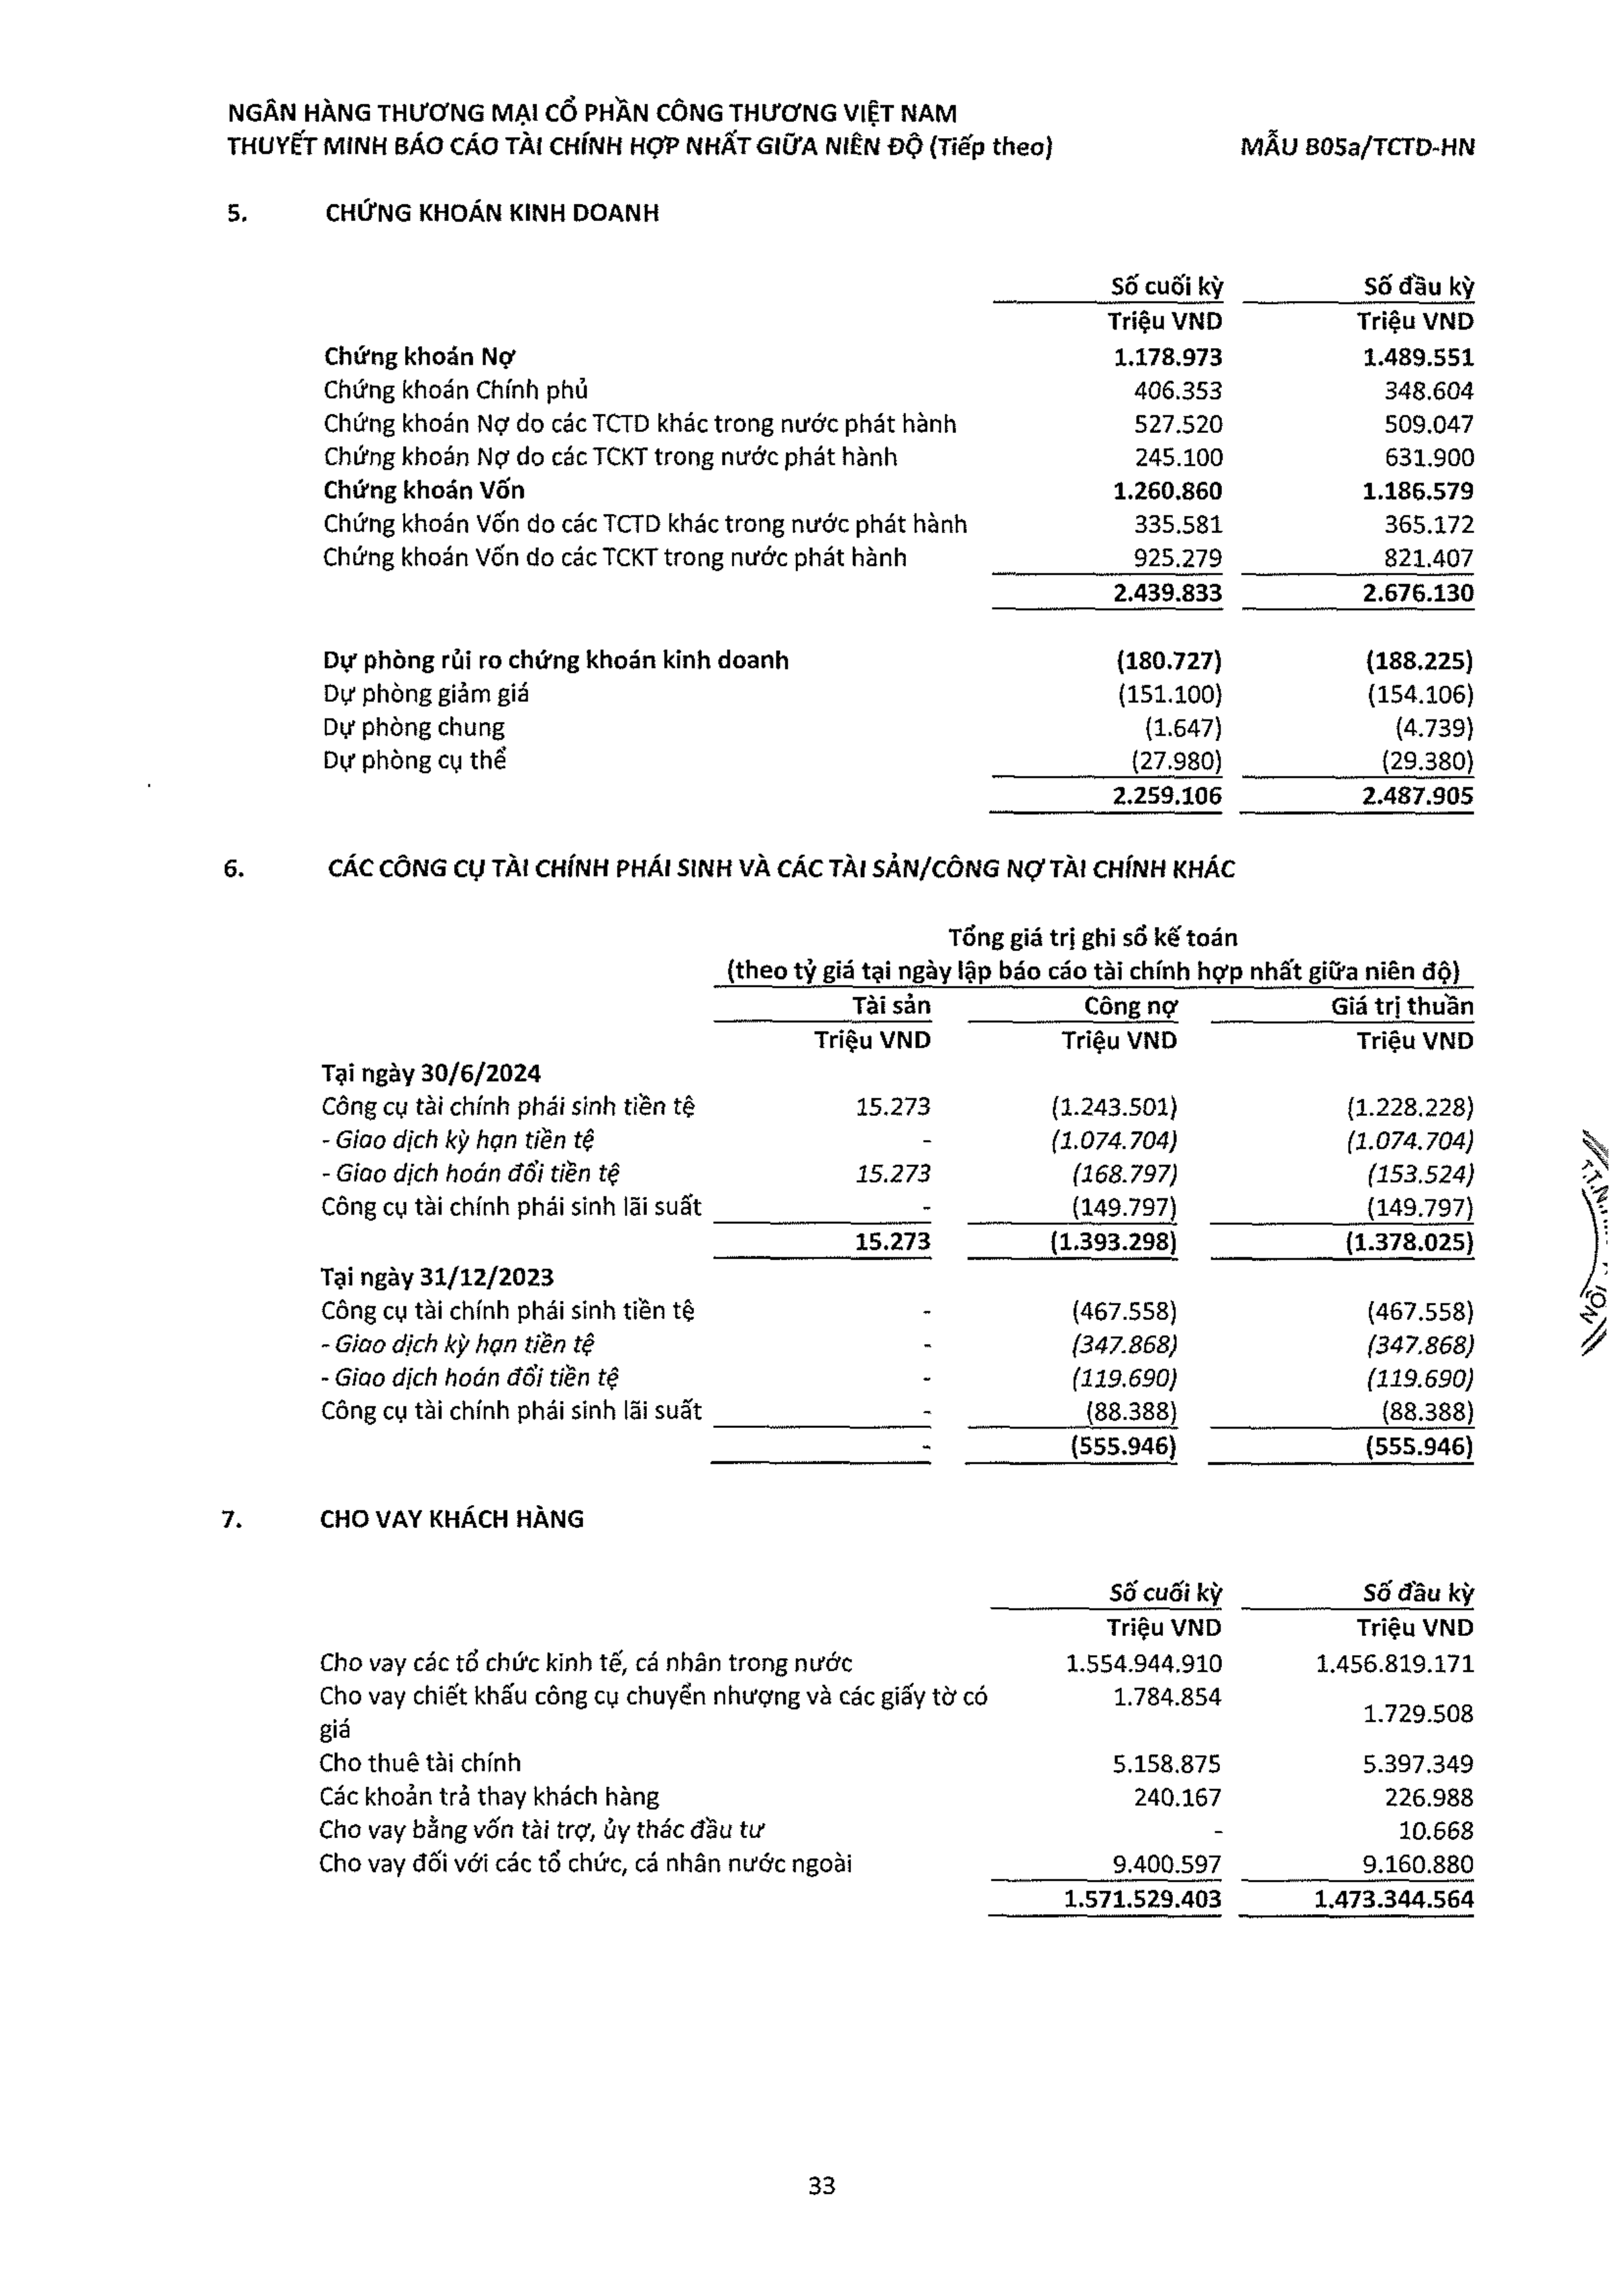

In [90]:
images[35]

In [38]:
system_prompt = "Bạn là công cụ OCR đặc thù cho các văn bản tài chính"
prompt = """
Bạn được cung cấp 1 hình ảnh trong bản báo cáo tài chính dạng pdf. Hãy trích xuất thông tin từ hình ảnh này dưới dạng HTML. 
Lưu ý :
- Phần header thường chứa tên công ty, địa chỉ, tên form và 1 vài thông tin chung khác 
- Trừ các phần header, footer, watermark, hãy lấy hết tất cả thông tin còn lại như bảng, tên bảng, tiêu đề, văn bản, số liệu,...
 - Chỉ cần dùng các thẻ html cần thiết, không cần thẻ <head> hoặc <body>.
 - Đối với các dòng tiêu đề căn giữa hoặc sử dụng số la mã, hãy sử dụng thẻ <h2>.
 - Đối với các dòng, tiêu đề kí hiệu bằng số <h3>.
"""

In [78]:
system_prompt_eng = "You are a specialized OCR tool for financial documents"
prompt_eng = """
You are provided with an image in a pdf financial report. Extract information from this image in HTML format.
Note:
- The header section usually contains the company name, address, form name, and some other general information
- Except for the possible header, footer and watermark, extract all the remaining information, including tables' names.
 - Only use the necessary html tags, no need for <head> or <body> tags.
 - For center-aligned or roman numeral headings (big or main heading), use the <h2> tag.
 - For lines, headings denoted by integer numbers use <h3> tags.
 - For tables, use the <table> tag.
"""

In [65]:
def ocr_with_llm(llm, image):
    message = [
        {
            "role": "system",
            "content": system_prompt_eng
        },
        {
            "role": "user",
            "content": [prompt_eng, image]
        }
    ]
    
    response = llm(message)
    print(response)
    return get_code_from_text_response(response)
    

In [91]:
llm = Gemini(model_name='gemini-1.5-flash-002')

In [92]:
response = ocr_with_llm(llm, images[35])
print(response[-1]['code'])

prompt_token_count: 407
candidates_token_count: 1459
total_token_count: 1866

```html
<h2>5. CHỨNG KHOÁN KINH DOANH</h2>
<table>
<tr>
<th>Số cuối kỳ<br>Triệu VND</th>
<th>Số đầu kỳ<br>Triệu VND</th>
</tr>
<tr>
<td>Chứng khoán Nợ</td>
<td>1.178.973</td>
<td>1.489.551</td>
</tr>
<tr>
<td>Chứng khoán Chính phủ</td>
<td>406.353</td>
<td>348.604</td>
</tr>
<tr>
<td>Chứng khoán Nợ do các TCTD khác trong nước phát hành</td>
<td>527.520</td>
<td>509.047</td>
</tr>
<tr>
<td>Chứng khoán Nợ do các TCKT trong nước phát hành</td>
<td>245.100</td>
<td>631.900</td>
</tr>
<tr>
<td>Chứng khoán Vốn</td>
<td>1.260.860</td>
<td>1.186.579</td>
</tr>
<tr>
<td>Chứng khoán Vốn do các TCTD khác trong nước phát hành</td>
<td>335.581</td>
<td>365.172</td>
</tr>
<tr>
<td>Chứng khoán Vốn do các TCKT trong nước phát hành</td>
<td>925.279</td>
<td>821.407</td>
</tr>
<tr>
<td><b>2.439.833</b></td>
<td><b>2.676.130</b></td>
</tr>
<tr>
<td>Dự phòng rủi ro chứng khoán kinh doanh</td>
<td>(180.727)</td>
<td>(188.225)</td